<a href="https://colab.research.google.com/github/Aurelien07/Kaggle_competition/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/digit-recognizer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/digit-recognizer/test.csv
/content/drive/My Drive/Colab Notebooks/digit-recognizer/sample_submission.csv
/content/drive/My Drive/Colab Notebooks/digit-recognizer/train.csv
/content/drive/My Drive/Colab Notebooks/digit-recognizer/digit_recognizer.ipynb


In [ ]:
test_ds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/digit-recognizer/test.csv')
train_ds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/digit-recognizer/train.csv')

let's vizualise the dataset first :

In [ ]:
display(train_ds.head())
display(train_ds.info())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


None

Now let's start with our class number to know which number we will find.

In [ ]:
num_classes = len(train_ds['label'].unique()) # Count the number of unique number normally we wil have 10

In [ ]:
num_classes # Confirm we have 10 classes 

10

Now we will have some random vizualisation of the score :

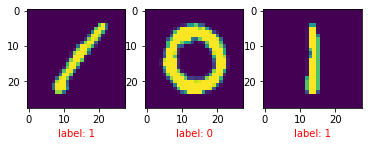

In [ ]:
IMG_SIZE = (28,28,1)
# Sample digit image
sample_images = train_ds.iloc[0:3,1:].values.reshape((-1,)+IMG_SIZE) # vizualise some numbers
fig, axs = plt.subplots(1, sample_images.shape[0])
for i,img in enumerate(sample_images):
    axs[i].imshow(img)
    axs[i].set_xlabel(f'label: {train_ds.iloc[i,0]}')
    axs[i].xaxis.label.set_color('red')

# Preprocessing :

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_ds,
                                                    test_size = 0.2,  # 20%
                                                    random_state = 0 # no random
                                                    )

ValueError: ignored